In [ ]:
# Pytorch implementation for thesis
# Will attempt to implement a CNN using the Oxford IIT Pet dataset
# The overall goal is to setup a more advanced baseline model
# for my thesis. 
# Once constructed, Techniques that i had previously researhced will be applied
# Testing if better on jupyter lab also 

In [ ]:
# Load
# Split training testing validation
# Batches 
# Preloading
# Explore
# Pre-process
# Augmentation
# Model Construction
# Model Architecture 
# Training
# Testing 
# Applying 



In [ ]:
pip install --upgrade pip

In [ ]:
pip install torch torchvision

In [ ]:
pip install --upgrade torchvision


In [2]:

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import glob
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import torch.optim as optim
from torch import nn
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import academictorrents as at
import tarfile
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torchvision.models as models


In [3]:
filenames = glob.glob('~/Desktop/Projects/Thesis/OxfordpetIII/oxford-iiit-pet/images/*.jpg')


In [4]:


# Specify the path and pattern
path = '~/Desktop/Projects/Thesis/OxfordpetIII/oxford-iiit-pet/images'
pattern = '*.jpg'
path = os.path.expanduser(path) # For some reason relative was not working

# Use glob to get the list of file paths
file_list = glob.glob(os.path.join(path, pattern))

# Check if any files were found
if len(file_list) == 0:
    print("No files found.")
else:
    print("Files found:", len(file_list))
    #for file in file_list:
        #print(file)


Files found: 7390


In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to a fixed size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image tensors
])

In [6]:
def load_image(filename) :
    img = Image.open(filename)
    img = img.convert('RGB')
    return img


In [7]:
classes = set()

data = []
labels = []

# Load the images and get the class names from the image path
for image in file_list:
    # Extract the class name from the image filename
    class_name = os.path.basename(image).rsplit('_', 1)[0]

    # Add the class name to the set of classes
    classes.add(class_name)

    img = load_image(image) 

    # Append the image data and label to the lists
    data.append(img)
    labels.append(class_name)

# Convert class names to indices
class2idx = {cl: idx for idx, cl in enumerate(classes)}
labels = torch.Tensor(list(map(lambda x: class2idx[x], labels))).long()

# Combine the image data and labels into a list of tuples
data = list(zip(data, labels))

In [8]:
data[0]

(<PIL.Image.Image image mode=RGB size=183x275 at 0x7FEB219B2EE0>, tensor(21))

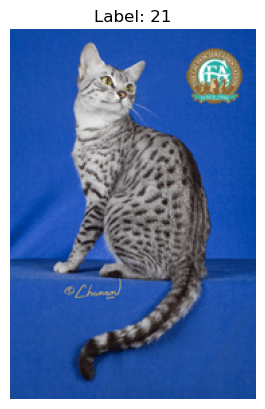

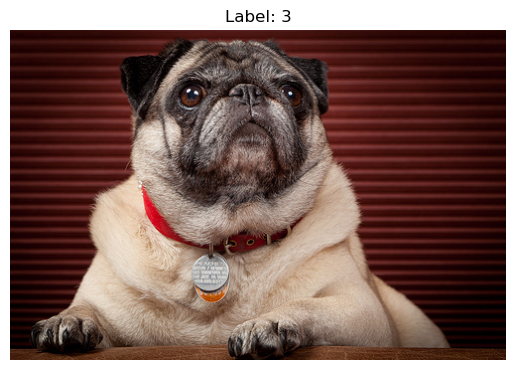

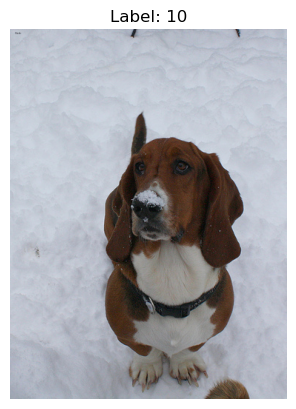

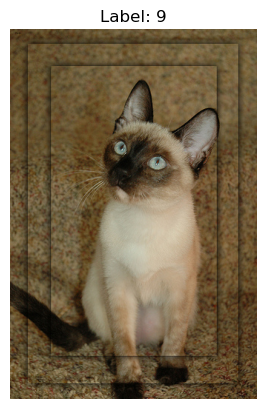

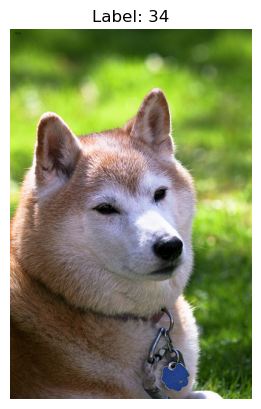

In [9]:
for image, label in data[:5]:
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Plot the image
    plt.imshow(image_array)
    plt.axis('off')
    plt.title(f'Label: {label}')
    plt.show()

In [10]:

# Load the ResNet-18 model with pretrained weights
resnet = models.resnet18(pretrained=True)
resnet.eval()



/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
class PetDataset(Dataset):
    "Dataset to serve individual images to our model"
    
    def __init__(self, data, transforms=None):
        self.data = data
        self.len = len(data)
        self.transforms = transforms
    
    def __getitem__(self, index):
        img, label = self.data[index]
        
        # Convert image to RGB if it has a single channel
        #if image.mode != 'RGB':
            #image = image.convert('RGB')
        
        if self.transforms:
            img = self.transforms(img)
            
        return img, label
    
    def __len__(self):
        return self.len

# Create a train and validation dataset with equal distribution of all represented classes
class Databasket():
    
    def __init__(self, data, num_cl, val_split=0.2, train_transforms=None, val_transforms=None):
        class_values = [[] for x in range(num_cl)]
        
        # create arrays for each class type
        for d in data:
            class_values[d[1].item()].append(d)
            
        self.train_data = []
        self.val_data = []
        
        # put (1-val_split) of the images of each class into the train dataset
        # and val_split of the images into the validation dataset
        for class_dp in class_values:
            split_idx = int(len(class_dp)*(1-val_split))
            self.train_data += class_dp[:split_idx]
            self.val_data += class_dp[split_idx:]
            
        self.train_ds = PetDataset(self.train_data, transforms=train_transforms)
        self.val_ds = PetDataset(self.val_data, transforms=val_transforms)

In [12]:
# Preprocessing
# Convert them all to the same size
# Grayscale
# Rotation 
# Flips
# Mean and standard dev values 
# reducing the size
# Apply transformations to the train dataset
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Grayscale(),  # Convert to grayscale
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Adjust normalization for grayscale
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Grayscale(),  # Convert to grayscale
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Adjust normalization for grayscale
])



In [13]:
# Define a custom dataset class to aply transformations
# Should merge with the other class functions 
class CustomDataset(Dataset):
    def __init__(self, data, classes, transform=None):
        self.data = data
        self.classes = classes
        self.transform = transform

    def __getitem__(self, idx):
        image, label = self.data[idx]
        
        # Convert image to RGB if it has a single channel
        #if image.mode != 'RGB':
            #image = image.convert('RGB')
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label
    
    def __len__(self):
        return len(self.data)

In [14]:
class ActivationCollector:
    def __init__(self):
        self.activations = []

    def __call__(self, module, inputs, outputs):
        self.activations.append(outputs)

def collect_activations(model, device, dataloader):
    # Move the model to the specified device
    model = model.to(device)

    # Set up the activation collector
    collector = ActivationCollector()

    # Register the collector as a hook for each layer in the model
    handles = []
    for name, module in model.named_modules():
        handle = module.register_forward_hook(collector)
        handles.append(handle)

    # Iterate over the data loader to forward pass the model and collect activations
    for inputs, _ in dataloader:
        inputs = inputs.to(device)
        _ = model(inputs)

    # Remove the hooks
    for handle in handles:
        handle.remove()

    # Return the collected activations
    return collector.activations


In [15]:
# Split the dataset into train and validation sets

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Create the Databasket object with train and validation datasets
databasket = Databasket(train_data, len(classes), val_split=0.2, train_transforms=train_transforms, val_transforms=val_transforms)

# Create data loaders
batch_size = 32
train_loader = DataLoader(databasket.train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(databasket.val_ds, batch_size=batch_size, shuffle=False)

In [16]:
import torch
import torch.nn as nn
import torchvision.models as models

def create_modified_resnet(num_classes):
    # Load the pretrained ResNet18 model
    model = models.resnet18(pretrained=True)

    # Freeze all the parameters in the pre-trained model
    for param in model.parameters():
        param.requires_grad = False

    # Modify the last fully connected layer for your classification task
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)

    # Optionally, you can unfreeze the last few layers for fine-tuning
    for param in model.layer4.parameters():
        param.requires_grad = True

    return model

# Example usage:
num_classes = len(classes)
model = create_modified_resnet(num_classes)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [18]:
criterion = torch.nn.CrossEntropyLoss()
epochs = 5
# We don't actually use the learning rate here. It's set to 1e-7 so that the LR Finder
# starts at 1e-7
optimizer = optim.Adam(model.parameters(), lr=1e-7,  weight_decay=1e-5)

scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-2, pct_start=0.3, steps_per_epoch=len(train_loader), epochs=epochs)


In [19]:
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-2, pct_start=0.3, steps_per_epoch=len(train_loader), epochs=epochs)

In [ ]:
from tqdm import tqdm

def train(epochs, scheduler, optimizer, model, device):
    for epoch in range(epochs):
        running_loss = 0
        n_correct = 0
        total_samples = 0
        
        # Use dropouts and batchnorms
        model.train()
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
        for batch in pbar:
            inputs, labels = batch
            
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            loss.backward()
            
            optimizer.step()
            scheduler.step()
            
            _, predicted = torch.max(outputs, 1)
            n_correct += (predicted == labels).sum().item()
            
            running_loss += loss.item()
            total_samples += labels.size(0)
            
            # Update progress bar
            train_acc = 100. * n_correct / total_samples
            pbar.set_postfix({"Train Loss": running_loss / len(pbar), "Train Acc": train_acc})
        
        train_loss = running_loss / len(train_loader)
        
        n_val_correct = 0
        val_loss = 0
        
        # Enable batchnorm and dropouts
        model.eval()
        # Don't calculate gradient
        with torch.no_grad():
            val_pbar = tqdm(val_loader, desc="Validation")
            for batch in val_pbar:
                inputs, labels = batch
                
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                val_loss = criterion(outputs, labels).item()

                n_val_correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
                
                val_acc = 100. * n_val_correct / len(databasket.val_ds)
                
                # Update validation progress bar
                val_pbar.set_postfix({"Val Loss": val_loss, "Val Acc": val_acc})
                
        print('Epoch %s: Train Accuracy: %.2f percent, Validation Accuracy: %.2f percent, Train Loss: %s, Validation Loss: %s' 
              % (epoch, train_acc, val_acc, train_loss, val_loss))
        
device = torch.device("cpu")  # Use CPU for training
train(epochs, scheduler, optimizer, model, device)


In [ ]:
from tqdm import tqdm

def train_with_activation_collection(epochs, scheduler, optimizer, model, device):
    activation_values = []  # List to store collected activation values

    for epoch in range(epochs):
        running_loss = 0
        n_correct = 0
        total_samples = 0

        # Use dropouts and batchnorms
        model.train()
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
        for batch in pbar:
            inputs, labels = batch

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()

            optimizer.step()
            scheduler.step()

            _, predicted = torch.max(outputs, 1)
            n_correct += (predicted == labels).sum().item()

            running_loss += loss.item()
            total_samples += labels.size(0)

            # Update progress bar
            train_acc = 100. * n_correct / total_samples
            pbar.set_postfix({"Train Loss": running_loss / len(pbar), "Train Acc": train_acc})

        train_loss = running_loss / len(train_loader)

        n_val_correct = 0
        val_loss = 0

        # Enable batchnorm and dropouts
        model.eval()
        # Don't calculate gradient
        with torch.no_grad():
            val_pbar = tqdm(val_loader, desc="Validation")
            for batch in val_pbar:
                inputs, labels = batch

                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                val_loss = criterion(outputs, labels).item()

                n_val_correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()

                val_acc = 100. * n_val_correct / len(databasket.val_ds)

                # Update validation progress bar
                val_pbar.set_postfix({"Val Loss": val_loss, "Val Acc": val_acc})

        print('Epoch %s: Train Accuracy: %.2f percent, Validation Accuracy: %.2f percent, Train Loss: %s, Validation Loss: %s' 
              % (epoch, train_acc, val_acc, train_loss, val_loss))

        # Collect activations after each epoch
        activations = collect_activations(model, device, train_loader)
        activation_values.append(activations)

    return activation_values

device = torch.device("cpu")  # Use CPU for training
activation_values = train_with_activation_collection(epochs, scheduler, optimizer, model, device)


In [ ]:
from tqdm import tqdm

def train_with_activation_collection(epochs, scheduler, optimizer, model, device, activation_interval):
    activation_values = []  # List to store collected activation values
    batch_counter = 0  # Counter to track the number of batches processed

    for epoch in range(epochs):
        running_loss = 0
        n_correct = 0
        total_samples = 0

        # Use dropouts and batchnorms
        model.train()
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
        for batch in pbar:
            inputs, labels = batch

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()

            optimizer.step()
            scheduler.step()

            _, predicted = torch.max(outputs, 1)
            n_correct += (predicted == labels).sum().item()

            running_loss += loss.item()
            total_samples += labels.size(0)

            # Update progress bar
            train_acc = 100. * n_correct / total_samples
            pbar.set_postfix({"Train Loss": running_loss / len(pbar), "Train Acc": train_acc})

            batch_counter += 1
            if batch_counter % activation_interval == 0:
                # Collect activations for the specified number of batches
                activations = collect_activations(model, device, train_loader)
                activation_values.append(activations)

        train_loss = running_loss / len(train_loader)

        n_val_correct = 0
        val_loss = 0

        # Enable batchnorm and dropouts
        model.eval()
        # Don't calculate gradient
        with torch.no_grad():
            val_pbar = tqdm(val_loader, desc="Validation")
            for batch in val_pbar:
                inputs, labels = batch

                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                val_loss = criterion(outputs, labels).item()

                n_val_correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()

                val_acc = 100. * n_val_correct / len(databasket.val_ds)

                # Update validation progress bar
                val_pbar.set_postfix({"Val Loss": val_loss, "Val Acc": val_acc})

        print('Epoch %s: Train Accuracy: %.2f percent, Validation Accuracy: %.2f percent, Train Loss: %s, Validation Loss: %s' 
              % (epoch, train_acc, val_acc, train_loss, val_loss))

device = torch.device("cpu")  # Use CPU for training
activation_interval = 5  # Collect activations every 5 batches
activation_values = train_with_activation_collection(epochs, scheduler, optimizer, model, device, activation_interval)



Epoch 1:   3%|▎         | 4/148 [00:19<09:37,  4.01s/it, Train Loss=0.112, Train Acc=20.6] 

In [ ]:
image, labels

# Decision boundaries

Predicted Class Probabilities: This approach directly shows the decision boundaries based on the model's final predictions. It gives you an overall view of how the model separates the input space into different classes. It is useful for understanding the global decision-making behavior of the model.

Activation Values: This approach focuses on the internal representations of the model. It allows you to visualize how the model processes and transforms the input data at different layers. By examining the decision boundaries based on activation values, you can identify regions where certain features or patterns are more prominent. This can provide insights into the model's understanding of the input data and its decision-making process.

Currently The below script, calculates and visualizes the decision boundaries based on the predicted class probabilities. It uses the final output of the model to determine the class prediction for each point in the grid, and then reshapes the predicted classes into the grid shape to create the decision boundary plot.

On the other hand, using activation values to build decision boundaries provides a different perspective. Activation values represent the intermediate representations learned by the model at various layers. By visualizing the decision boundaries based on activation values, you can gain insights into how the model's internal representations contribute to its predictions. This can help you understand which features or patterns in the input space are important for the model to make decisions.

In [ ]:
# Decision boundary Modal Predictions
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundaries(model, device, test_dataloader, labels):
    # Generate a grid of points spanning the input space
    x_min, x_max = -1, .5
    y_min, y_max = -1, 1.5
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Move the grid to the device
    grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)
    
    num_points = grid_tensor.size(0)
    grid_tensor = grid_tensor.view(num_points, 1, 1, 2)
    
    # Expand the grid tensor to have 3 channels
    grid_tensor = grid_tensor.expand(num_points, 3, 1, 2) 
    
    # Get the predicted class probabilities for the grid points
    model.eval()
    with torch.no_grad():
        logits = model(grid_tensor)
        probabilities = torch.softmax(logits, dim=1)
        _, predicted_classes = torch.max(probabilities, 1)
        predicted_classes = predicted_classes.cpu().numpy()
    
    # Reshape the predicted classes into the grid shape
    decision_boundary = predicted_classes.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, decision_boundary, alpha=0.8, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries')
    plt.show()


# Assuming you have the labels for your classification problem
labels_list = [x for x in range(0,37)]

# Assuming you have trained your model and stored it in the 'model' variable

# Set the model to evaluation mode
model.eval()

# Move the model to the desired device
model.to(device)

# Create a test dataloader with a single batch
#test_loader = DataLoader(test_dataloader.dataset, batch_size=len(test_dataloader.dataset), shuffle=False)
val_loader = DataLoader(databasket.val_ds, batch_size=batch_size, shuffle=False)


# Call the function to visualize the decision boundaries
plot_decision_boundaries(model, device, val_loader, labels_list)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

def actplot_decision_boundaries(model, device, test_dataloader, labels, layer_name):
    # Generate a grid of points spanning the input space
    x_min, x_max = -1, .5
    y_min, y_max = -1, 1.5
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Move the grid to the device
    grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)
    
    # Get the input shape of ResNet-18 from the first convolutional layer
    input_shape = get_input_shape_ResNet18(model, device, grid_tensor)
    
    # Reshape the grid tensor to have a batch dimension
    grid_tensor = grid_tensor.unsqueeze(0).expand(grid_tensor.size(0), *input_shape)
    
    # Get the activations for the specified layer
    activations = get_activations(model, grid_tensor, layer_name)
    
    # Reshape the activations into the grid shape
    decision_boundary = activations.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, decision_boundary, alpha=0.8, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries')
    
    # Plot the data points with labels
    for i, (data, target) in enumerate(test_dataloader):
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        plt.scatter(data[:, 0].cpu().numpy(), data[:, 1].cpu().numpy(), c=target.cpu().numpy(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Add legend for labels
    unique_labels = np.unique(labels)
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor='k') for label in unique_labels]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.show()


def get_input_shape_ResNet18(model, device, input_tensor):
    # Move the input tensor to the device
    input_tensor = input_tensor.to(device)
    
    # Get the first convolutional layer of ResNet-18
    first_conv_layer = None
    for module in model.modules():
        if isinstance(module, nn.Conv2d):
            first_conv_layer = module
            break
    
    if first_conv_layer is None:
        raise ValueError("Failed to retrieve the first convolutional layer of ResNet-18.")
    
    # Perform a forward pass through the first convolutional layer
    output = first_conv_layer(input_tensor)
    
    # Retrieve the output shape of the first convolutional layer
    input_shape = output.shape[1:]
    
    return input_shape

def get_activations(model, input_tensor, layer_name):
    activations = []
    x = input_tensor
    for name, module in model.named_children():
        x = module(x)
        if name == layer_name:
            x = x.view(x.size(0), -1)
            return x
        activations.append(x)
    raise ValueError("Layer name '{}' not found in model.".format(layer_name))


# The mat1 refers to the input tensor, and mat2 corresponds to the weight matrix of the linear module.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def get_activations(model, input_tensor, layer_name):
    activations = []
    x = input_tensor
    for name, module in model.named_children():
        x = module(x)
        if name == layer_name:
            x = x.view(x.size(0), -1)
            return x
        activations.append(x)
    raise ValueError("Layer name '{}' not found in model.".format(layer_name))

def actplot_decision_boundaries(model, device, test_dataloader, labels, layer_name):
    # Generate a grid of points spanning the input space
    x_min, x_max = -1, .5
    y_min, y_max = -1, 1.5
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Move the grid to the device
    grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)

    # Get the activations for the specified layer
    activations = get_activations(model, grid_tensor, layer_name)

    # Reshape the activations into the grid shape
    decision_boundary = activations.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, decision_boundary, alpha=0.8, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Activation Values')

    # Plot the data points with labels
    for i, (data, target) in enumerate(test_dataloader):
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        plt.scatter(data[:, 0].cpu().numpy(), data[:, 1].cpu().numpy(), c=target.cpu().numpy(), edgecolors='k', cmap=plt.cm.Paired)

    # Add legend for labels
    unique_labels = np.unique(labels)
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor='k') for label in unique_labels]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.show()


In [ ]:
actplot_decision_boundaries(model, device, val_loader, labels_list, "layer4")
    # Generate a grid of points spanning the input space

In [ ]:
def get_activations(model, device, layer_name, input_tensor):
    # Move the model and input tensor to the specified device
    model = model.to(device)
    input_tensor = input_tensor.to(device)

    # Activate evaluation mode
    model.eval()

    # Register a forward hook to capture the activations
    activations = []

    def hook(module, input, output):
        activations.append(output.detach())

    target_layer = getattr(model, layer_name)
    handle = target_layer.register_forward_hook(hook)

    # Perform a forward pass through the model
    model(input_tensor)

    # Unregister the forward hook
    handle.remove()

    # Return the captured activations
    return activations[0]


In [ ]:
def get_activations(model, device, layer_name, input_tensor):
    # Move the input tensor to the specified device
    input_tensor = input_tensor.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Forward pass through the model
    with torch.no_grad():
        # Retrieve the activations for the specified layer
        activations = None
        for module_name, module in model.named_modules():
            if module_name == layer_name:
                activations = module(input_tensor)
                break

    return activations


In [ ]:
# Get a batch of input data from the data loader
batch_inputs, _ = next(iter(val_loader))
batch_inputs = batch_inputs.to(device)

# Get the activations for a specific layer
activations = get_activations(model, device, layer_name, batch_inputs)

In [ ]:
# CAMs

In [ ]:
# Salience Decision Boundaries 

In [ ]:
# Explainable Image Classification with evidence counterfactual 
#https://arxiv.org/abs/2004.07511

In [ ]:
# Decision Based Adverserial Attacks 

In [ ]:
# Distributed Biased Boundary Attacks 

In [ ]:
# Decision Trees random Forest

In [ ]:
# SVM

In [ ]:
# Hybrid Decision Tree SVM

In [ ]:
# Border point extraction based on locality-sensitive hashing (BPLSH)
# https://www.sciencedirect.com/science/article/pii/S0020025521007052

In [ ]:
# Decision Boundary Approximation 